# Практические задания

In [2]:
import pandas as pd
from IPython.display import display
churn_df = pd.read_csv('data_13/churn.csv')
churn_df.drop(['RowNumber'], axis=1, inplace=True) # удаление дублирующего столбца
display(churn_df.head())

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Задание 1

Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению

Text(0.5, 1.0, 'Соотношение ушедших и лояльных клиентов')

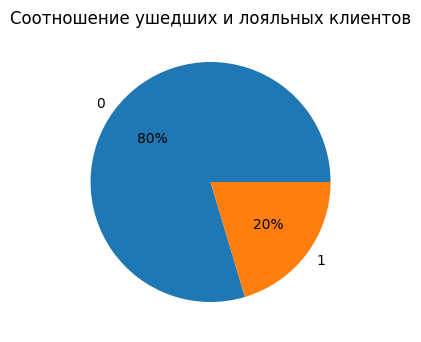

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline  
plt.style.use('default')
              
exited = churn_df['Exited'].value_counts(normalize=True)*100

fig = plt.figure(figsize=(3, 3))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited,
    labels=exited.index,
    autopct='%.0f%%',
)
axes.set_title('Соотношение ушедших и лояльных клиентов')

Вывод:
Из предоставленных данных мы видим, что за указанный период лояльными остались 80% клиентов, отказались от услуг банка 20%. Несмотря на то, что 20% кажется не очень большой долей, это означает, что ушел каждый пятый клиент. Такая ситуация, конечно, требует анализа и разработки системы лояльности.

# Задание 2

Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [10]:
# узнаем максимальный баланс, чтобы выяснить разброс
print(churn_df['Balance'].max())

250898.09


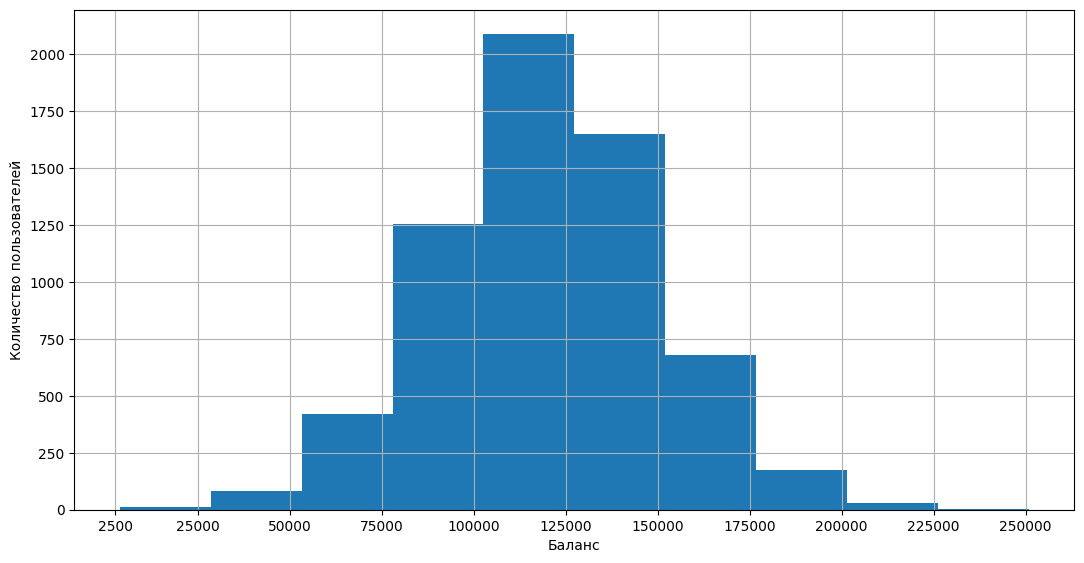

In [14]:
import seaborn as sns

balance = churn_df[churn_df['Balance'] > 2500]
labels=[2500, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 225000, 250000]
# список меток для оси абсцисс

fig = plt.figure(figsize=(10, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(
    x=balance['Balance'],
    bins=10,
)
('Распределение баланса пользователей, у которых на счету больше 2 500 долларов')
axes.set_xlabel('Баланс')
axes.set_ylabel('Количество пользователей')
axes.set_xticks(labels)
axes.grid()

Выводы:
Подавляющее число клиентов, имеющих на балансе больше 2 500 долларов, имеют на счетах от 100 000 до 125 000 долларов (более 2 000 пользователей). Около 1600 клиентов имеют на счетах от 125 000 до 150 000 долларов. Около 1250 клиентов имеют на счетах от 75 000 до 100 000 долларов. Именно для этих  категорий клиентов и следует разрабатывать программу лояльности.
Естественно, меньше всего количество пользователей, держащих на счетах максимальную сумму - от 200 000 до 250 000 долларов.
Интересно, что пользователей, имеющих от 2 500 до 25 000 долларов очень мало - меньше 100 человек.

# Задание 3

Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

C:\Users\mors0\AppData\Local\Temp\ipykernel_4056\781266994.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


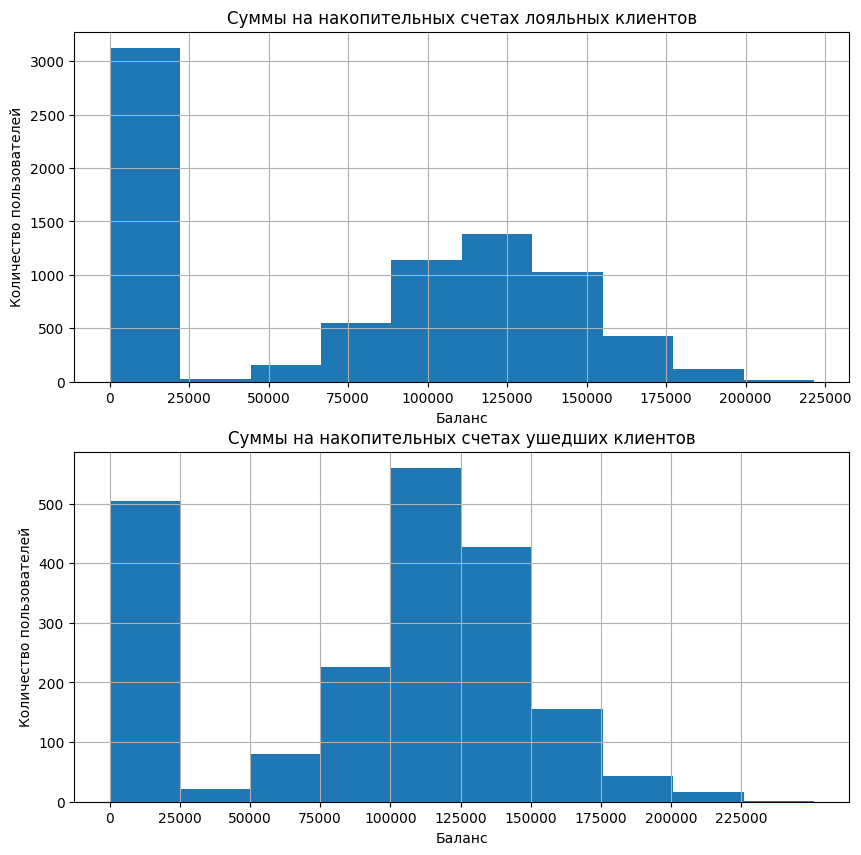

In [20]:
loyal = churn_df[churn_df['Exited']==0] # лояльные клиенты
exited = churn_df[churn_df['Exited']==1] # ушедшие клиенты

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

axes[0].hist(
    x=loyal['Balance'],
    bins=10,
    
)
axes[0].set_title('Суммы на накопительных счетах лояльных клиентов')
axes[0].set_xlabel('Баланс')
axes[0].set_ylabel('Количество пользователей')
axes[0].set_xticks(range(0, 250000, 25000))
axes[0].grid()

axes[1].hist(
    x=exited['Balance'],
    bins=10,
)
axes[1].set_title('Суммы на накопительных счетах ушедших клиентов')
axes[1].set_xlabel('Баланс')
axes[1].set_ylabel('Количество пользователей')
axes[1].set_xticks(range(0, 250000, 25000))
axes[1].grid()

fig.show()